<a href="https://colab.research.google.com/github/oscarGENIX/Computation_complexity/blob/main/Computation_Complexity_Project_Data_Stream_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context : Data Stream, the Computational Complexity project

In this project we want to respond to a simple problematic : 

*   write an algorithm that give the **100 maximum numbers** of a very large stream of number (> 100&nbsp;000)
*   with the **smallest memory cost** possible (<1 KiB)
*   with the **lowest algorithmic complexity** possible

---

**This deliverable** is a Jupyter Notebook composed of several parts :
 - Presentation and codes of your algorithm(s)
 - Check : result validity
 - Check : memory complexity curves
 - Challenge : time complexity curves 

# Presentation of your algorithm(s) and their codes




## Algorithm #1 (simple)



### Idea developped

*Please evoque HERE what you tried to do*

### Code

In [ ]:
#This function read the file AS A STREAM seek the maximum value on the go => TO BE CHANGED BY YOU
def filterMaxByLineSimple(filename):
  with open(filename,"r") as f: # Opening the file in reading mode
    if f.mode == 'r': # If opening went well and the file is readable
      #Initialisation of max search
      first=True
      max_value=0

      line = f.readline() # Loading the first line
      while line: # While there is new line to be read
        value = int(line) # String to int conversion
        if first or max_value < value: # Seeking maximum value
          max_value=value
          first=False
        line = f.readline() # Loading the next line
    return([max_value]) # Printing the maximum value

## Algorithm #2 (optimised ? optional !)



### Idea developped

*Please evoque HERE what you tried to do*

### Code

In [ ]:
# This function read the file AS A STREAM seek the maximum value on the go => TO BE CHANGED BY YOU
def filterMaxByLineOptimized(filename):
    with open(filename, "r") as f:  # Opening the file in reading mode
        if f.mode == 'r':  # If opening went well and the file is readable
            # Initialisation of max search

            max_tableau = [0] * 100

            max_value_min = 0
            index_value = 0 
            min = 0
            index = 0

            line = f.readline()
            
            for i in range(len(max_tableau)):
                value = int(line)
                max_tableau[i] = value
                line = f.readline()
            heapSort(max_tableau)
            max_value_min = max_tableau[0]

            line = f.readline()  # Loading the 101 line
            while line:  # While there is new line to be read
                value = int(line)  # String to int conversion 
                if max_value_min < value: 
                  max_tableau[index_value]= value
                  # Seeking maximum value
                  min = max_tableau[0]
                  index = 0
                  for i in range(len(max_tableau)):
                    if max_tableau[i] < min:
                      min = max_tableau[i]
                      index = i
                  max_value_min = min
                  index_value=index  
                line = f.readline()  # Loading the next line
        return (max_tableau)  # Printing the maximum value

def heapify(arr, n, i):
    largest = i # Initialize largest as root
    l = 2 * i + 1	 # left = 2*i + 1
    r = 2 * i + 2	 # right = 2*i + 2

# See if left child of root exists and is
# greater than root
    if l < n and arr[i] < arr[l]:
        largest = l

# See if right child of root exists and is
# greater than root
    if r < n and arr[largest] < arr[r]:
        largest = r

# Change root, if needed
    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i] # swap

    # Heapify the root.
        heapify(arr, n, largest)

# The main function to sort an array of given size
def heapSort(arr):
    n = len(arr)

# Build a maxheap.
# Since last parent will be at ((n//2)-1) we can start at that location.
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)
# One by one extract elements
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i] # swap
        heapify(arr, i, 0)

# Prerequisite to the profiling

In [ ]:
!pip install pprofile
!pip install memory_profiler

     |████████████████████████████████| 61kB 3.8MB/s 
  Created wheel for pprofile: filename=pprofile-2.0.5-cp37-none-any.whl size=34838 sha256=0d7487597e1eee8e7451d6750302fd4360df3f859984abadb3351e4a020606c4
  Stored in directory: /root/.cache/pip/wheels/b7/7e/dc/fa6663a43280716fe9a4fedfcfaae1e22fc26c701afff093c6
Successfully built pprofile
  Created wheel for memory-profiler: filename=memory_profiler-0.58.0-cp37-none-any.whl size=30180 sha256=cc3a53478b882c894a2c3c205a8a15e0f3fe7b48ef22db061eae1e7f1f09e936
  Stored in directory: /root/.cache/pip/wheels/02/e4/0b/aaab481fc5dd2a4ea59e78bc7231bb6aae7635ca7ee79f8ae5
Successfully built memory-profiler


### Generate the data files online :

In [ ]:
import sys
import numpy as np

filelist={"A_100mille.txt":100000,"B_200mille.txt":200000,"C_1Million.txt":1000000}

np.random.seed(42) # Common seed for comparison between every participants

for filename, dataSize in filelist.items():
    f= open(filename,"w")
    for i in range(0,dataSize):
	    f.write("%d\r\n" % np.random.randint(-sys.maxsize-1,sys.maxsize))
    f.close

!ls -lh # Printing the list of file available

total 1.3G
-rw-r--r-- 1 root root  2.1M Apr 21 15:02 A_100mille.txt
-rw-r--r-- 1 root root  2.1K Apr 21 14:59 A_dixmille.txt
-rw-r--r-- 1 root root  4.1M Apr 21 15:02 B_200mille.txt
-rw-r--r-- 1 root root   21K Apr 21 14:59 B_centmille.txt
-rw-r--r-- 1 root root   21M Apr 21 15:02 C_1Million.txt
-rw-r--r-- 1 root root  105K Apr 21 15:02 C_cinqcentmille.txt
-rw-r--r-- 1 root root  204M Apr 21 14:28 D_10million.txt
-rw-r--r-- 1 root root   21M Apr 21 14:27 D_unmillion.txt
-rw-r--r-- 1 root root 1020M Apr 21 14:59 E_50million.txt
drwxr-xr-x 1 root root  4.0K Apr  7 13:36 sample_data


#Check : Result validity

Getting the verification data by cheating

In [ ]:
def cheaterFunction(filename):
  with open(filename,"r") as f: # Opening the file in reading mode
    if f.mode == 'r': # If opening went well and the file is readable
      array = sorted(map(int, f.readlines()), reverse=True) # Loading the whole file, convert it to integers and sort it
      return array[0:100]

resultCheck={}
for filename,dataSize in filelist.items():
  resultCheck[filename] = cheaterFunction(filename)

Actual verification of your code

In [ ]:
for filename,dataSize in filelist.items():
  resultSimple = filterMaxByLineSimple(filename)
  resultSimple.sort(reverse=True)
  if (resultCheck[filename] != resultSimple):
    print("Invalid result for the simple algorithm with", filename, "!")
    print("Extrait du resultat attendu : ",resultCheck[filename])
    print("Extrait du resultat obtenu : ",resultSimple)
    break
  else:
    print("Simple algorithm with", filename, ": OK")



Invalid result for the simple algorithm with A_100mille.txt !
Extrait du resultat attendu :  [9223225204532880781, 9222928909263254571, 9222858284390276097, 9222577933965557959, 9222259722531932299, 9221985318308665545, 9221545367331528018, 9221353203941887783, 9221068139476566927, 9221000483634425738, 9220922221667941473, 9220842769444678892, 9220761367450099316, 9220469593673657575, 9220444547260163141, 9220260401698000500, 9220120867523032164, 9220013685440393057, 9219777462281109222, 9219610081214910129, 9219486530108030273, 9219432517995981870, 9219110179419054908, 9218929754577041395, 9218838283495445692, 9218801603250055094, 9218429869367402493, 9218164957756032470, 9218164057221768836, 9218034102855414616, 9217902802645911087, 9217786608703173155, 9217757025873781309, 9217651363958182046, 9217343733930804766, 9217327195648345898, 9217243893358279278, 9217032074864168573, 9216907098730937416, 9216531271702181433, 9216421516764576407, 9216341763648956430, 9215963526524829739, 921

In [ ]:
for filename,dataSize in filelist.items():
  resultOptimized = filterMaxByLineOptimized(filename)
  resultOptimized.sort(reverse=True)
  if (resultCheck[filename] != resultOptimized):
    print("Invalid result for the optimized algorithm with", filename, "!")
    print("Extrait du resultat attendu : ",resultCheck[filename])
    print("Extrait du resultat obtenu : ",resultOptimized)
    break
  else:
    print("Optimized algorithm with", filename, ": OK")


Optimized algorithm with A_100mille.txt : OK
Optimized algorithm with B_200mille.txt : OK
Optimized algorithm with C_1Million.txt : OK


# Check : Memory complexity curves

In [ ]:
from memory_profiler import memory_usage #Import the library

sizeList=[]
mcostListSimple=[]
mcostListOptimized=[]
mcostListThreshold=[]

# We will iterate on each file to find the complexity curve
for filename,dataSize in filelist.items():
  sizeList.append(dataSize)
  mem_during_execution = memory_usage((filterMaxByLineSimple,(filename,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
  memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
  mcostListSimple.append(memory_increment)
  mem_during_execution = memory_usage((filterMaxByLineOptimized,(filename,))) #memory_usage take the function name and its paramater(s). It return an array of memory size during execution
  memory_increment = max(mem_during_execution)-min(mem_during_execution) #The memory used by the function
  mcostListOptimized.append(memory_increment)
  mcostListThreshold.append(0.001)

print(sizeList)
print(mcostListSimple)
print(mcostListOptimized)





[100000, 200000, 1000000]
[0.0, 0.0, 0.0]
[0.0, 0.0, 0.0]


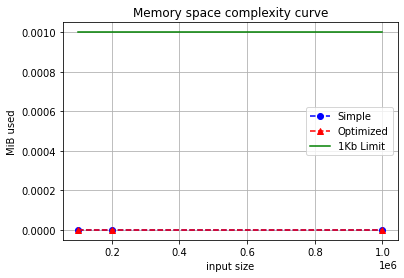

In [ ]:
#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above

fig, ax = plt.subplots()
ax.plot(sizeList, mcostListSimple,'--bo', label="Simple")
ax.plot(sizeList, mcostListOptimized,'--r^', label="Optimized")
ax.plot(sizeList, mcostListThreshold,'-g', label="1Kb Limit")

ax.set(xlabel='input size', ylabel='MiB used',
       title='Memory space complexity curve')
ax.grid()
ax.legend()
plt.show()

**Your curve should stay below the limit**

# Challenge : time complexity curves 

In [ ]:
import pprofile
import pstats
import numpy as np

sizeList=[]
tcostListSimple=[]
tcostListOptimized=[]
tcostListCorrectThreshold=[]
tcostListGoodThreshold=[]

# We will iterate on each file to find the complexity curve
for filename,dataSize in filelist.items():
  sizeList.append(dataSize)

  prof = pprofile.Profile()
  prof.runcall(filterMaxByLineSimple, filename)
  timingFile = list(prof.file_dict.values())[0][0]
  tcostListSimple.append(timingFile.getTotalHitCount())

  prof = pprofile.Profile()
  prof.runcall(filterMaxByLineOptimized, filename)
  timingFile = list(prof.file_dict.values())[0][0]
  tcostListOptimized.append(timingFile.getTotalHitCount())

  tcostListCorrectThreshold.append(7.1*dataSize)
  tcostListGoodThreshold.append(5.1*dataSize)

print(sizeList)
print(tcostListSimple)
print(tcostListOptimized)

[100000, 200000, 1000000]
[400032, 800044, 3999674]
[560823, 976538, 4199830]


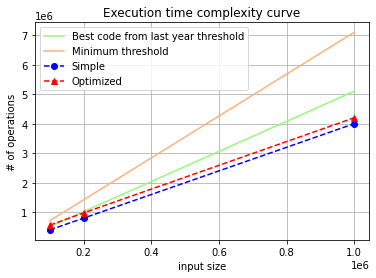

In [ ]:
#Let's plot things !
import matplotlib
import matplotlib.pyplot as plt

# Data for plotting
#sizeList and costList from above

fig, ax = plt.subplots()
ax.plot(sizeList, tcostListGoodThreshold,'-', color='xkcd:light green', label="Best code from last year threshold")
ax.plot(sizeList, tcostListCorrectThreshold,'-', color='xkcd:peach', label="Minimum threshold")
ax.plot(sizeList, tcostListSimple,'--bo', label="Simple")
ax.plot(sizeList, tcostListOptimized,'--r^', label="Optimized")

ax.set(xlabel='input size', ylabel='# of operations',
       title='Execution time complexity curve')
ax.grid()
ax.legend()
plt.show()

**Your code should not be above the orange curve and the closest possible to the green one (or below ?)**

# Bonus : What is the best/worst cases of your algorithms

Explain HERE what are the best/worst cases of your algorithms